In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

In [ ]:
# mnistデータセット 28×28
(x_train, _), (x_test, _) = mnist.load_data()

# 正規化する（0~1の範囲で表す） 計算量を減らすため
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [ ]:
# (28×28 = )784　次元を64次元に圧縮して、decoderで元の画像(28×28)に再構成する
latent_dim = 64 

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
      layers.Dense(36, activation='relu')
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(64, activation='relu'),
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

In [ ]:
# 最適化関数と損失関数を指定
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [ ]:
# 
autoencoder.fit(x_train, x_train,
                epochs=20,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
1875/1875 [==============================] - 7s 2ms/step - loss: 0.0293 - val_loss: 0.0169
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0149 - val_loss: 0.0129
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0126 - val_loss: 0.0114
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0114 - val_loss: 0.0105
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0106 - val_loss: 0.0098
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0100 - val_loss: 0.0094
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0096 - val_loss: 0.0092
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0094 - val_loss: 0.0091
Epoch 9/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0092 - val_loss: 0.0090
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.009

In [ ]:
# 訓練後のモデルで、テストセットから画像をエンコード、デコードしてモデルをテストする
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

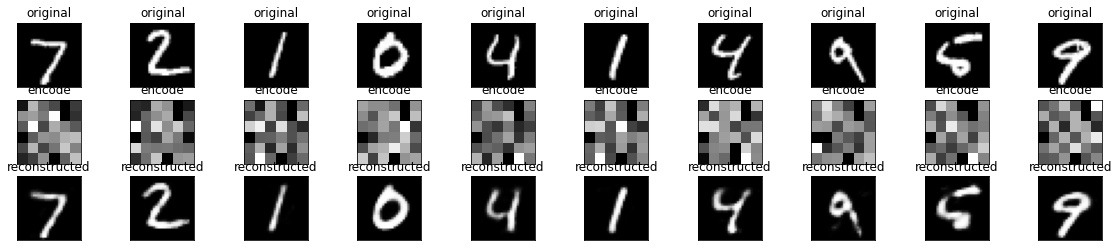

In [ ]:
# 元画像と訓練後の結果を表示する
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(3, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # hedding layer（encode）
  ax = plt.subplot(3, n, i + n + 1)
  enc_img = encoded_imgs[i].reshape(6, 6)
  plt.imshow(enc_img, cmap=cm.gray_r)
  plt.title("encode")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(3, n, i + n + n + 1)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

# 課題3 隠れ層の最小次元は2とする

In [ ]:
# (28×28 = )784　次元を64次元に圧縮して、decoderで元の画像(28×28)に再構成する
latent_dim = 64 

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
      layers.Dense(2, activation='relu')
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(64, activation='relu'),
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder2 = Autoencoder(latent_dim)

In [ ]:
# 最適化関数と損失関数を指定
autoencoder2.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [ ]:
# 
autoencoder2.fit(x_train, x_train,
                epochs=20,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0605 - val_loss: 0.0525
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0508 - val_loss: 0.0490
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0483 - val_loss: 0.0474
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0470 - val_loss: 0.0466
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0461 - val_loss: 0.0458
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0454 - val_loss: 0.0452
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0449 - val_loss: 0.0449
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0445 - val_loss: 0.0444
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0441 - val_loss: 0.0441
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.043

In [ ]:
# 訓練後のモデルで、テストセットから画像をエンコード、デコードしてモデルをテストする
encoded_imgs = autoencoder2.encoder(x_test).numpy()
decoded_imgs = autoencoder2.decoder(encoded_imgs).numpy()

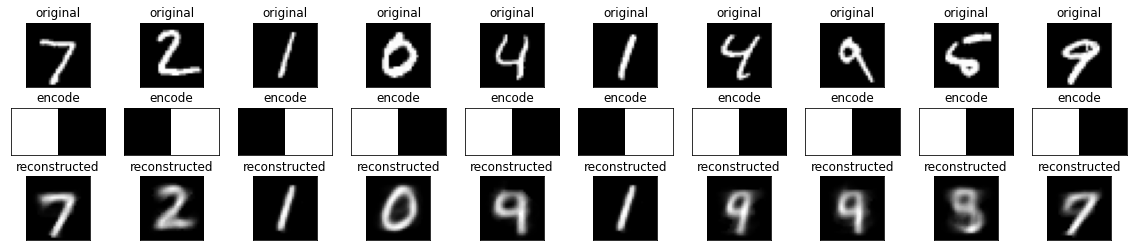

In [ ]:
# 元画像と訓練後の結果を表示する
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(3, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # hedding layer（encode）
  ax = plt.subplot(3, n, i + n + 1)
  enc_img = encoded_imgs[i].reshape(1,2)
  plt.imshow(enc_img, cmap=cm.gray_r)
  plt.title("encode")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(3, n, i + n + n + 1)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()